In [283]:
import pandas as pd
import numpy as np
import seaborn as sns

In [284]:
df=pd.read_csv("placement.csv")

In [285]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [286]:
X=df.iloc[:,0:1]

In [287]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [288]:
Y=df.iloc[:,-1]

In [289]:
Y


0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

<Axes: xlabel='cgpa', ylabel='package'>

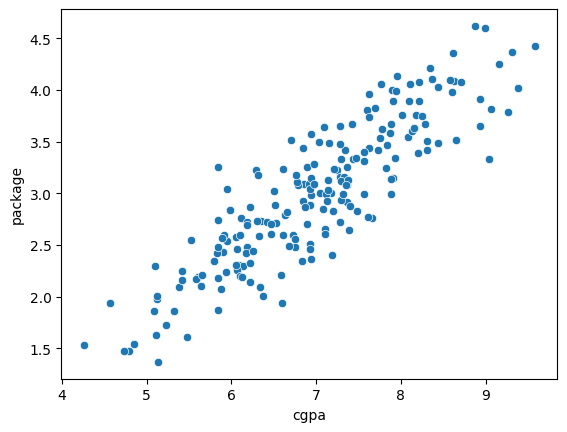

In [291]:
sns.scatterplot(x=df['cgpa'],y=df['package'])

In [292]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [293]:
lr.fit(X_train,Y_train)

LinearRegression()

In [294]:
y_pred=lr.predict(X_test)

In [295]:
y_pred

array([3.92587536, 3.16355518, 2.9903006 , 2.59181505, 3.55049042,
       3.21553156, 3.32525946, 3.19243095, 2.5975902 , 4.37633728,
       3.23285702, 2.55138898, 2.96719998, 2.19910466, 3.10580365,
       2.45321138, 2.53406352, 1.76019304, 3.08270304, 2.85747208,
       3.83347291, 2.77084479, 3.16355518, 1.91612217, 3.79304684,
       2.60336536, 2.55138898, 4.19153239, 2.50518776, 3.38301099,
       2.03162522, 3.78149654, 2.37235924, 4.12223055, 2.66689204,
       3.2097564 , 3.65444317, 3.25018247, 3.54471527, 2.57448959])

In [296]:
lr.coef_

array([0.57751528])

In [297]:
lr.intercept_

np.float64(-1.0407560912203833)

<Axes: xlabel='cgpa', ylabel='package'>

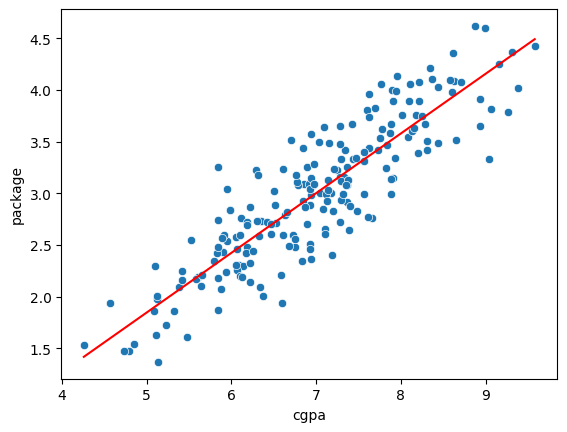

In [298]:
sns.scatterplot(x=df['cgpa'],y=df['package'])
sns.lineplot(x=X_train['cgpa'],y=lr.predict(X_train),color='red')

In [299]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [300]:
mean_absolute_error(Y_test,y_pred)

0.2887112427722363

In [301]:
mean_squared_error(Y_test,y_pred)

0.1238762374058977

In [302]:
root_mean_squared_error(Y_test,y_pred)

0.35196056228773376

In [303]:
r2=r2_score(Y_test,y_pred)

In [304]:
r2

0.7318083368217707

In [305]:
r2adj=1-((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-1))

In [306]:
r2adj

0.7247506614749752

In [307]:
df2=df.copy()
df2['random']=np.random.random(df.shape[0])

In [308]:
df2

,cgpa,package,random
0,6.89,3.26,0.597133
1,5.12,1.98,0.147793
2,7.82,3.25,0.802336
3,7.42,3.67,0.907317
4,6.94,3.57,0.300253
...,...,...,...
195,6.93,2.46,0.893862
196,5.89,2.57,0.844702
197,7.21,3.24,0.639735
198,7.63,3.96,0.101608


<Axes: xlabel='cgpa', ylabel='random'>

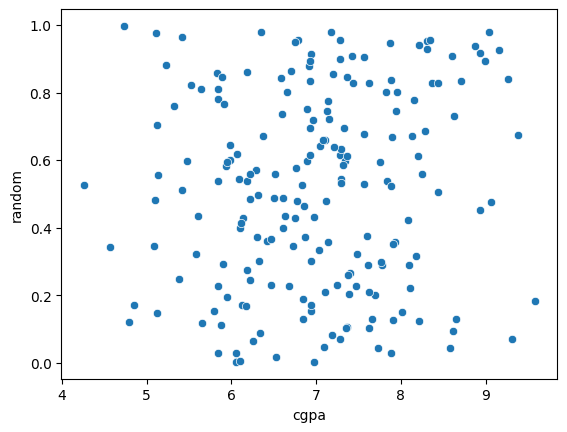

In [309]:
sns.scatterplot(x=df2['cgpa'],y=df2['random'])

In [310]:
X=df2[['cgpa','random']]

In [311]:
X

,cgpa,random
0,6.89,0.597133
1,5.12,0.147793
2,7.82,0.802336
3,7.42,0.907317
4,6.94,0.300253
...,...,...
195,6.93,0.893862
196,5.89,0.844702
197,7.21,0.639735
198,7.63,0.101608


In [312]:
Y=df2['package']

In [313]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [314]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [315]:
lr.fit(X_train,Y_train)

LinearRegression()

In [316]:
y_pred=lr.predict(X_test)

In [317]:
y_pred

array([3.5159722 , 3.53595503, 2.9316608 , 2.35711569, 3.23858263,
       2.49338675, 2.09223722, 3.59268007, 3.82961083, 4.07339075,
       3.17089439, 1.71262386, 3.22266002, 2.55046179, 3.08133764,
       2.96872994, 2.55363885, 2.14502045, 4.29690874, 3.19843669,
       2.75059504, 3.65477909, 3.64228747, 2.98089032, 2.9826586 ,
       3.43433385, 3.28846948, 3.39339747, 2.83354998, 2.17080077,
       2.42999071, 2.72781246, 3.40962969, 3.53323213, 2.86471301,
       2.5008609 , 2.56732424, 4.11347535, 3.28389147, 3.93909703])

In [318]:
r2_score(Y_test,y_pred)

0.7602333811494175

In [319]:
r2adj=1-((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-2))

In [320]:
r2adj

0.717311490163488